<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import numpy as np

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [4]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **Task 1: Become familiar with the dataset**
The following describes the dataset variables:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

#### **Overview of the Dataset**




In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## **Task 2: Generate Descriptive Statistics and Visualizations**


#### 1) Boxplot for "Median value of owner - occupied homes"

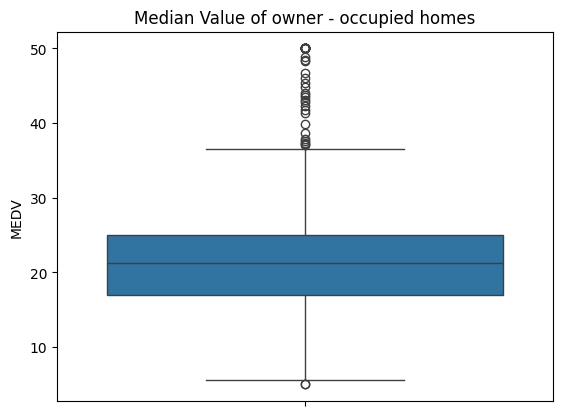

In [8]:
ax = sns.boxplot(y = "MEDV", data = boston_df)
ax.set_title('Median Value of owner - occupied homes')

pyplot.show()

#### **Explanation:**
The boxplot for MEDV shows that the median home value is around 21,000 USD. There are several high - outlier, indicating that a small number of homes are significantly more expensive than the majority.

#### 2) Bar Plot for the Charles river variable

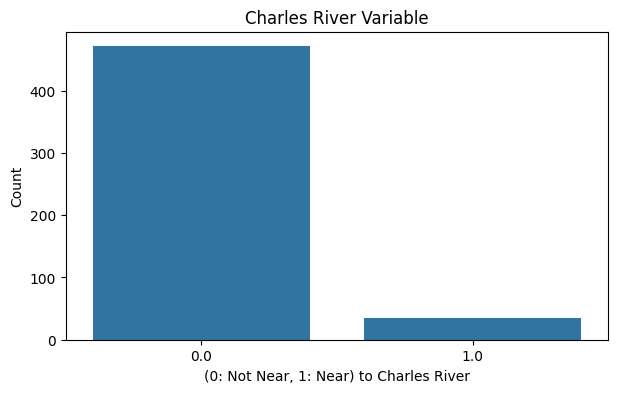

In [12]:
pyplot.figure(figsize = (7, 4))
sns.countplot(x = boston_df['CHAS'])
pyplot.title("Charles River Variable")
pyplot.xlabel("(0: Not Near, 1: Near) to Charles River")
pyplot.ylabel("Count")

pyplot.show()

#### **Explanation:**
The above bar plot shows that most of housing tracts do not border the Charles River, while only a small number do.

#### 3) Boxplot for the MEDV variable vs the AGE variable

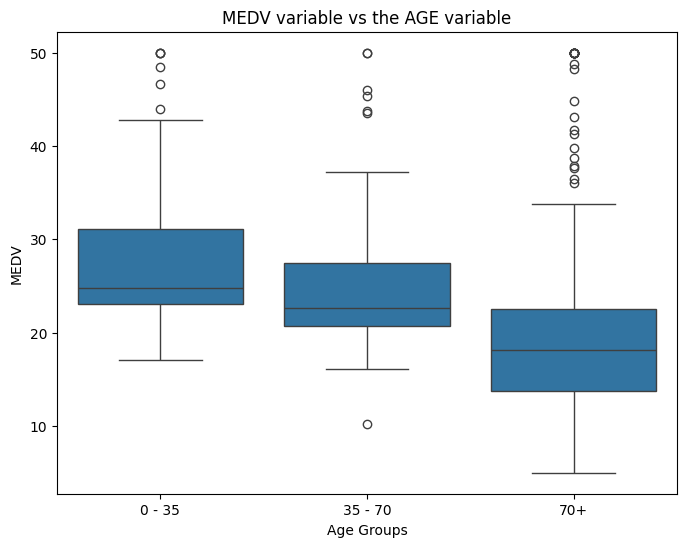

In [16]:
bins = [0, 35, 70, np.inf]
labels = ['0 - 35', '35 - 70', '70+']
boston_df['age_groups'] = pd.cut(boston_df['AGE'], bins = bins, labels = labels, right = True)
pyplot.figure(figsize = (8,6))
sns.boxplot(x = boston_df['age_groups'], y = boston_df['MEDV'])
pyplot.title('MEDV variable vs the AGE variable')
pyplot.xlabel('Age Groups')
pyplot.ylabel('MEDV')

pyplot.show()

#### **Explanation:**
The boxplot indicates that neighborhoods with newer buildings (AGE Group 0-35) generally have higher median home values, while areas with older buildings (AGE Group 70+) tend to have lower values, suggesting a negative association between building age and home value.

#### 4) Scatter plot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

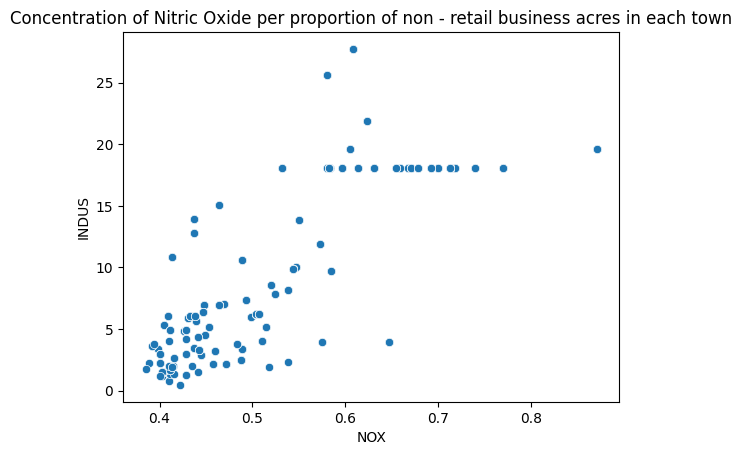

In [17]:
ax4 = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax4.set_title('Concentration of Nitric Oxide per proportion of non - retail business acres in each town')

pyplot.show()

#### **Explanation:**
The scatter plot indicates a positive linear correlation between the proportion of non - retail business town and nitric oxide concentration.

Towns with greater industrial activity generally exhibits higher levels of NOX.

#### 5) Histogram for the pupil to teacher ratio variable

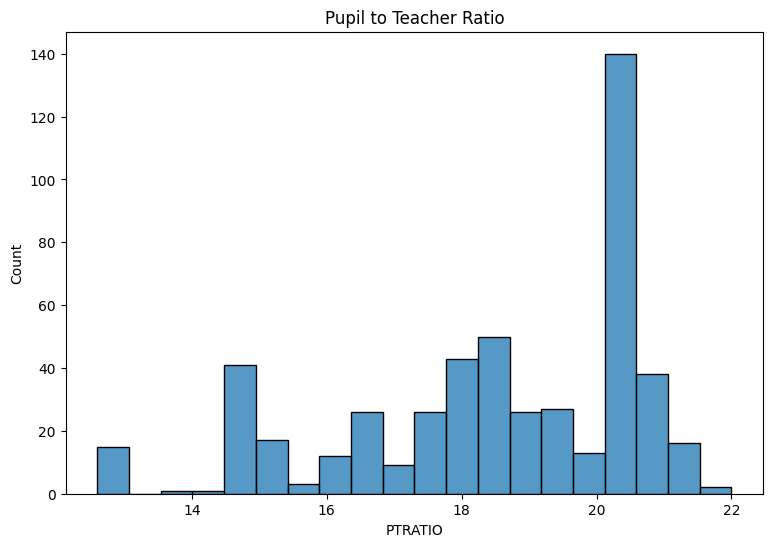

In [19]:
pyplot.figure(figsize = (9, 6))
sns.histplot(boston_df["PTRATIO"], bins = 20, kde = False)
pyplot.title("Pupil to Teacher Ratio")
pyplot.xlabel = ("Pupil to Teacher Ratio")
pyplot.ylabel = ("Count")

pyplot.show()

#### **Explanation:**
The histogram of pupil to teacher ratio variable shows that most have a ratio clustereed around 19 to 21.

## **Task 3: Use the appropriate tests to answer the questions provided**

#### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



**Hypothesis**

H₀ (Null Hypothesis) = There is no significant difference in the median home values between houses located by the Charles River (CHAS = 1) and those that are not (CHAS = 0)

H₁ (Alternative Hypothesis) = There is a significant difference in the median home values between these two groups

In [25]:
from scipy.stats import ttest_ind

group_1 = boston_df[boston_df['CHAS'] == 1]["MEDV"]
group_2 = boston_df[boston_df['CHAS'] == 0]["MEDV"]

t_stat, p_value = scipy.stats.ttest_ind(group_1, group_2, equal_var = True)

print(f"T - statistic: {t_stat:.4f}")
print(f"P - value: {p_value:.4f}")

T - statistic: 3.9964
P - value: 0.0001


In [26]:
alpha = 0.05

if p_value < alpha:
  print("We reject the Null Hypothesis: There is a significant difference in MEDV based on CHAS")

else:
  print("We do not reject the Null Hypothesis: There is no significant difference in MEDV based on CHAS")

We reject the Null Hypothesis: There is a significant difference in MEDV based on CHAS


#### 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis**

H₀ (Null Hypothesis) = The means of MEDV are equal for all groups of AGE

H₁ (Alternative Hypothesis) = At least one of the means of MEDV is different

In [29]:
group_1 = boston_df[boston_df['age_groups'] == '0 - 35']["MEDV"]
group_2 = boston_df[boston_df['age_groups'] == '35 - 70']["MEDV"]
group_3 = boston_df[boston_df['age_groups'] == '70+']["MEDV"]

f_stat, p_value = scipy.stats.f_oneway(group_1, group_2, group_3)

print(f"F - statistic: {f_stat:.4f}")
print(f"P - value: {p_value:.4f}")

F - statistic: 36.4076
P - value: 0.0000


In [30]:
alpha = 0.05

if p_value < alpha:
  print("We reject the Null Hypothesis: There is a significant difference in Median Home Values based on AGE")

else:
  print("We do not reject the Null Hypothesis: There is no significant difference in Median Home Values based on AGE")

We reject the Null Hypothesis: There is a significant difference in Median Home Values based on AGE


#### 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis**

H₀ (Null Hypothesis) = There is no linear correlation between the two variables

H₁ (Alternative Hypothesis) = There is a significant linear correlation between the two variables

In [31]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient r = {r_value:.4f}")
print(f"P - value: {p_value:.4f}")

Correlation coefficient r = 0.7637
P - value: 0.0000


In [32]:
alpha = 0.05

if p_value < alpha:
  print("We reject the Null Hypothesis: There is a significant linear correlation between NOX and INDUS")

else:
  print("We do not reject the Null Hypothesis: There is no significant linear correlation between NOX and INDUS")

We reject the Null Hypothesis: There is a significant linear correlation between NOX and INDUS


#### 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis**

H₀ (Null Hypothesis) = There is no significant impact of the distance to employment centers on the median value of homes

H₁ (Alternative Hypothesis) = There is a significant impact of the distance to employment centers on the median value of homes

In [33]:
import statsmodels.api as sm

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        05:30:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Distance to employment centers significantly affects the median value of homes.**

**As the distance to employment increases, median value of homes increases by 1.0916**